# Linear regression in diabetes dataset

Let's explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)).

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns

In [43]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes(as_frame=True,scaled=False)

Let's explore this variable by looking at the different attributes (keys) of `diabetes`. Note that the `load_diabetes` function does not return dataframes. It returns you a Python dictionary.

In [37]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

#### The next step is to read the description of the dataset. 

Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable. Read the data description carefully to fully understand what each column represents.

*Hint: If your output is ill-formatted by displaying linebreaks as `\n`, it means you are not using the `print` function.*

In [18]:
print(diabetes["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

#### Based on the data description, answer the following questions:

1. How many attributes are there in the data? What do they mean?

1. What is the relation between `diabetes['data']` and `diabetes['target']`?

1. How many records are there in the data?

In [ ]:
# 1. En el dataset hay un total de 10 atributos propios para cada pciente, desde su edad a su sexo, pasando por medidas tomadas en análisis de sangre
# 2. diabetes["data"] te devuelve un array de valores de shape (442,10), que corresponde al valor de cada feature (10 columnas) para cada paciente. diabetes["target"] es el valor asociado a cada conjunto de datos propios de cada paciente 
# (en este caso es una medida de la progresión de la enfermedad 1 año después de las medidas definidas en "data")
# 3. En data tenemos 442 filas correspondientes a 442 pacientes y para cada paciente tenemos 10 features y 1 target

#### Now explore what are contained in the *data* portion as well as the *target* portion of `diabetes`. 

Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). Inspect the shape of `data` and `target`. Confirm they are consistent with the data description.

In [21]:
diabetes["data"].shape

(442, 10)

In [22]:
diabetes["target"].shape

(442,)

## Building a regression model

The data have already been split to predictor (*data*) and response (*target*) variables. Given this information, we'll apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset.

#### In the cell below, import the `linear_model` class from `sklearn`. 

In [23]:
from sklearn import linear_model

#### Create a new instance of the linear regression model and assign the new instance to the variable `diabetes_model`.

In [24]:
diabetes_model = linear_model.LinearRegression()

#### Next, let's split the training and test data.

Define `diabetes_data_train`, `diabetes_target_train`, `diabetes_data_test`, and `diabetes_target_test`. Use the last 20 records for the test data and the rest for the training data.

In [25]:
from sklearn.model_selection import train_test_split

In [55]:
diabetes["data"]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0
...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0


In [56]:
diabetes["target"]

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [58]:
diabetes_data_train, diabetes_data_test, diabetes_target_train, diabetes_target_test = train_test_split(diabetes["data"], diabetes["target"], test_size = 20, random_state = 42,shuffle=False) #Importanta fijar una semilla con random_state

In [59]:
print(diabetes_data_train.shape)
print(diabetes_data_test.shape)
print(diabetes_target_train.shape)
print(diabetes_target_test.shape)

(422, 10)
(20, 10)
(422,)
(20,)


Perform a brief exploratory analysis to investigate the conditions necessary for linear regression. This analysis will help you understand the distribution of the target variable and its correlations with other features.

Fit the training data and target to `diabetes_model`. Print the *intercept* and *coefficients* of the model.

In [60]:
diabetes_model.fit(diabetes_data_train,diabetes_target_train)

LinearRegression()

In [62]:
print(diabetes_model.intercept_)

-333.07642761492406


In [63]:
print(diabetes_model.coef_)

[ 1.11189912e-03 -2.26518397e+01  5.50264072e+00  1.12832513e+00
 -1.12017963e+00  7.71597175e-01  3.78624197e-01  6.81207592e+00
  6.77753611e+01  3.15200445e-01]


In [64]:
coeff_df = pd.DataFrame(diabetes_model.coef_,
                        diabetes["data"].columns,
                        columns=['Coefficient'])
coeff_df

,Coefficient
age,0.001112
sex,-22.651840
bmi,5.502641
bp,1.128325
s1,-1.120180
s2,0.771597
s3,0.378624
s4,6.812076
s5,67.775361
s6,0.315200


#### Inspecting the results

From the outputs you should have seen:

- The intercept is a float number.
- The coefficients are an array containing 10 float numbers.

This is the linear regression model fitted to your training dataset.

#### Using your fitted linear regression model, predict the *y* of `diabetes_data_test`.

In [65]:
diabetes_data_test

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
422,27.0,2.0,33.6,110.00,246.0,156.6,57.0,4.00,5.0876,89.0
423,51.0,2.0,22.7,103.00,217.0,162.4,30.0,7.00,4.8122,80.0
424,49.0,2.0,27.4,89.00,177.0,113.0,37.0,5.00,4.9053,97.0
425,27.0,1.0,22.6,71.00,116.0,43.4,56.0,2.00,4.4188,79.0
426,57.0,2.0,23.2,107.33,231.0,159.4,41.0,5.63,5.0304,112.0
427,39.0,2.0,26.9,93.00,136.0,75.4,48.0,3.00,4.1431,99.0
428,62.0,2.0,34.6,120.00,215.0,129.2,43.0,5.00,5.3660,123.0
429,37.0,1.0,23.3,88.00,223.0,142.0,65.0,3.40,4.3567,82.0
430,46.0,1.0,21.1,80.00,205.0,144.4,42.0,5.00,4.5326,87.0
431,68.0,2.0,23.5,101.00,162.0,85.4,59.0,3.00,4.4773,91.0


In [66]:
predictions = diabetes_model.predict(diabetes_data_test)
predictions

array([197.61898486, 155.44031962, 172.88875144, 111.53270645,
       164.79397301, 131.06765869, 259.12441219, 100.47873746,
       117.06005372, 124.30261597, 218.36868146,  61.19581944,
       132.24837933, 120.33293546,  52.54513009, 194.03746764,
       102.5756431 , 123.56778709, 211.03465323,  52.60221696])

y = a + b*x1 + c*x2 + d*x3 + ....

#### Print your `diabetes_target_test` and compare with the prediction. 

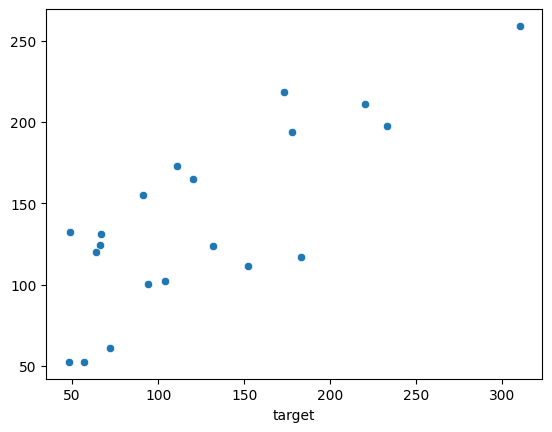

In [69]:
sns.scatterplot(x = diabetes_target_test, y = predictions);

#### Is `diabetes_target_test` exactly the same as the model prediction? Use different error metrics

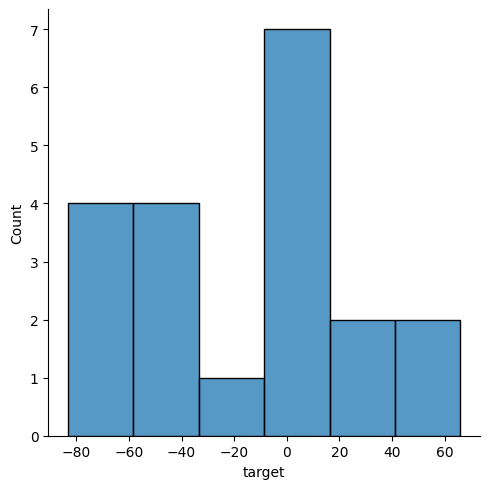

In [70]:
sns.displot((diabetes_target_test - predictions));

In [71]:
from sklearn import metrics

In [72]:
diabetes_model.score(diabetes_data_test, diabetes_target_test) #Cuanto más se acerque a 1 el score mejor (de normal que siempre sea mayor que 0.7 es lo óptimo)

0.5850854274471944

In [73]:
print('MAE:', metrics.mean_absolute_error(diabetes_target_test, predictions))
print('MSE:', metrics.mean_squared_error(diabetes_target_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(diabetes_target_test, predictions)))

MAE: 36.609618655458824
MSE: 2004.5186863342128
RMSE: 44.77185149549003


#### Iterate with a new model to assess if any improvements can be made compared to the previous one. Consider reducing the number of variables or using `StandardScaler` to enhance model performance.

In [80]:
diabetes["data"].columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [81]:
X = diabetes["data"][["age","sex","bmi","bp","s1","s3","s4","s5","s6"]] # Iteramos quitando la columna s2

In [82]:
X

,age,sex,bmi,bp,s1,s3,s4,s5,s6
0,59.0,2.0,32.1,101.00,157.0,38.0,4.00,4.8598,87.0
1,48.0,1.0,21.6,87.00,183.0,70.0,3.00,3.8918,69.0
2,72.0,2.0,30.5,93.00,156.0,41.0,4.00,4.6728,85.0
3,24.0,1.0,25.3,84.00,198.0,40.0,5.00,4.8903,89.0
4,50.0,1.0,23.0,101.00,192.0,52.0,4.00,4.2905,80.0
...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,42.0,4.00,4.9836,93.0
438,47.0,2.0,24.9,75.00,225.0,42.0,5.00,4.4427,102.0
439,60.0,2.0,24.9,99.67,162.0,43.0,3.77,4.1271,95.0
440,36.0,1.0,30.0,95.00,201.0,42.0,4.79,5.1299,85.0


In [83]:
y = diabetes["target"]
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=20,
                                                    random_state=42,
                                                    shuffle=False)

dia_model = linear_model.LinearRegression() 
dia_model.fit(X_train, y_train)

predictions = dia_model.predict(X_test)
predictions

# A little bit lower without Avg. Area Number of Bedrooms
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 36.619289870863
MSE: 1988.658442346688
RMSE: 44.59437680186469


## Datos de la primera predicción (con la columna s2 incluida)

### MAE: 36.609618655458824
### MSE: 2004.5186863342128
### RMSE: 44.77185149549003